# Familiarize Yourself with the Dataset
You will use the “Musical Instruments” dataset from the Amazon Review
data 2023 (5-core subset). The complete data contains ∼ 213 000 entries, which
is computationally expensive to process. Therefore, for this project, you will
use a smaller version of the dataset that has been provided. The project dataset
contains 14 000 item ratings from nearly 900 users on ∼ 500 items.
We will use the pre-computed training and test splits train.tsv and test.tsv
with 80% and 20% of the data respectively. These files can be found in Absalon.
The files are in TSV format (fields in each row are tab-separated), you thus need
read-in tools. You can use pandas for data wrangling. You are free to utilize
other tools if you wish.

Nice read on "How to set up Anaconda and Jupyter Notebook the right way": https://towardsdatascience.com/how-to-set-up-anaconda-and-jupyter-notebook-the-right-way-de3b7623ea4a

In [2]:
import json
import pandas as pd
import gzip

## STEP 1
Download and import the dataset splits.

In [3]:
# import the dataset splits
train_data = pd.read_csv('train.tsv', sep='\t')
test_data = pd.read_csv('test.tsv', sep='\t')
len(train_data)

11000

In [4]:
len(test_data)

3000

## Step 2

Clean both splits from missing information (e.g., missing user ID or item
ID) and duplicates (cases where the same user has rated the same item
multiple times) if any.


In [22]:
# data cleaning by dropping rows with NaN in the 'rating' column and duplicates
# also check the number of data being cleaned in each step
def data_cleaning(df):
    initial_length = len(df)

    df = df.sort_values(by=['user_id', 'item_id', 'timestamp'])
    # remove NAN ratings
    df_no_nan = df.dropna(subset=['rating'])
    nan_removed_count = initial_length - len(df_no_nan)
    # remove duplicates
    df_cleaned = df_no_nan.drop_duplicates(subset=['user_id', 'item_id'], keep='last')
    duplicates_removed_count = len(df_no_nan) - len(df_cleaned)
    
    print(f"NaN values removed: {nan_removed_count}")
    print(f"Duplicates removed: {duplicates_removed_count}")
    
    return df_cleaned

print("Clean train data:")
train_data = data_cleaning(train_data)
print("Clean test data:")
test_data = data_cleaning(test_data)

print("Length of cleaned train data:", len(train_data))
print("Length of cleaned test data:", len(test_data))

Clean train data:
NaN values removed: 0
Duplicates removed: 1087
Clean test data:
NaN values removed: 0
Duplicates removed: 1178
Length of cleaned train data: 9913
Length of cleaned test data: 1822


In [23]:
# Calculate unique counts for train, test, and full set
def calculate_unique_counts(df, name):
    unique_users = df['user_id'].nunique()
    unique_items = df['item_id'].nunique()
    print(f"Unique users in {name}: {unique_users}")
    print(f"Unique items in {name}: {unique_items}")
    return unique_users, unique_items

train_unique_users, train_unique_items = calculate_unique_counts(train_data, "training set")
test_unique_users, test_unique_items = calculate_unique_counts(test_data, "test set")

# Combine train and test data for full set
full_data = pd.concat([train_data, test_data])
full_unique_users, full_unique_items = calculate_unique_counts(full_data, "full set")

# Print lengths of cleaned data
print("Length of cleaned train data:", len(train_data))
print("Length of cleaned test data:", len(test_data))
print("Length of cleaned full data:", len(full_data))

Unique users in training set: 800
Unique items in training set: 509
Unique users in test set: 437
Unique items in test set: 413
Unique users in full set: 800
Unique items in full set: 518
Length of cleaned train data: 9913
Length of cleaned test data: 1822
Length of cleaned full data: 11735


## Step 3

Double check that all users from the test split also appear in the training
set, and remove those that do not appear in training.

In [24]:
def further_clean(train, test):
    test = test[test['user_id'].isin(train['user_id'])]

    return test

test_data = further_clean(train_data, test_data)
print("Observations in test set:", len(test_data))

Observations in test set: 1822


## Step 4

Compute user and item statistics (such as distribution of ratings per
user/item) for the training set train.tsv and write a discussion; does the
dataset have important properties that should be taken into account or
that may mislead the evaluation?


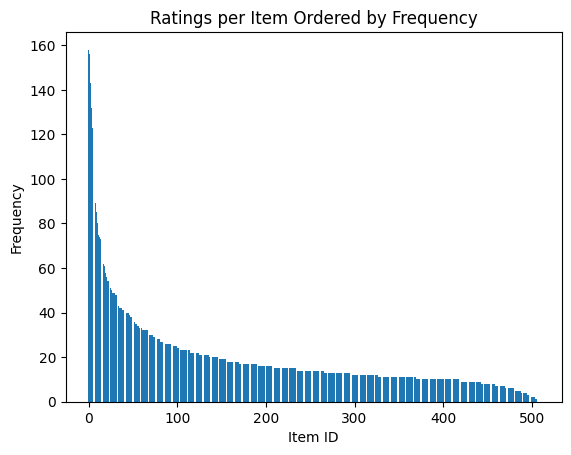

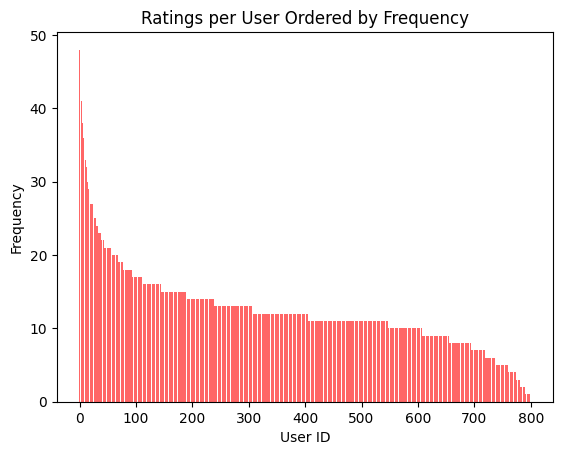

In [18]:
import matplotlib.pyplot as plt 
# data distribution from training set
# item_rating frequency
df_train = train_data
num_rating = df_train.groupby('item_id').size().reset_index(name = 'num_rating')
num_rating.sort_values(by = ['num_rating'], ascending=False, inplace=True)

plt.bar(range(len(num_rating)), num_rating['num_rating'])
plt.xlabel('Item ID')
plt.ylabel('Frequency')
plt.title('Ratings per Item Ordered by Frequency')
plt.show()

# user rating frequency
df_train = train_data
num_rating = df_train.groupby('user_id').size().reset_index(name = 'num_rating')
num_rating.sort_values(by = ['num_rating'], ascending=False, inplace=True)

plt.bar(range(len(num_rating)), num_rating['num_rating'], alpha = 0.6,color = 'red')
plt.xlabel('User ID')
plt.ylabel('Frequency')
plt.title('Ratings per User Ordered by Frequency')
plt.show()

## Step 5
Compute the frequency of items that were rated highly, i.e., rating ≥ 3.
Count how many times each musical instrument was highly rated. We will
use this as the TopPop recommender system in Week 7. Report in a table
the top 5 most highly rated items with the number of rates and average
rate.


In [19]:

high_ratings = train_data[train_data['rating'] >= 3]

stats = high_ratings.groupby('item_id').agg(num_ratings=('rating', 'count'), avg_rating=('rating', 'mean')).reset_index()

top_items = stats.sort_values(by=['avg_rating', 'num_ratings'], ascending=False).head(5)
print(top_items)


        item_id  num_ratings  avg_rating
286  B07N2HQ1T7           28         5.0
214  B0742RB7JK           14         5.0
254  B07C9YCY5J           14         5.0
31   B000U0DU34           13         5.0
473  B0BT2W3TTM           13         5.0


In [9]:
train_data.to_pickle("train_dataframe.pkl")
test_data.to_pickle("test_dataframe.pkl")